In [4]:
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

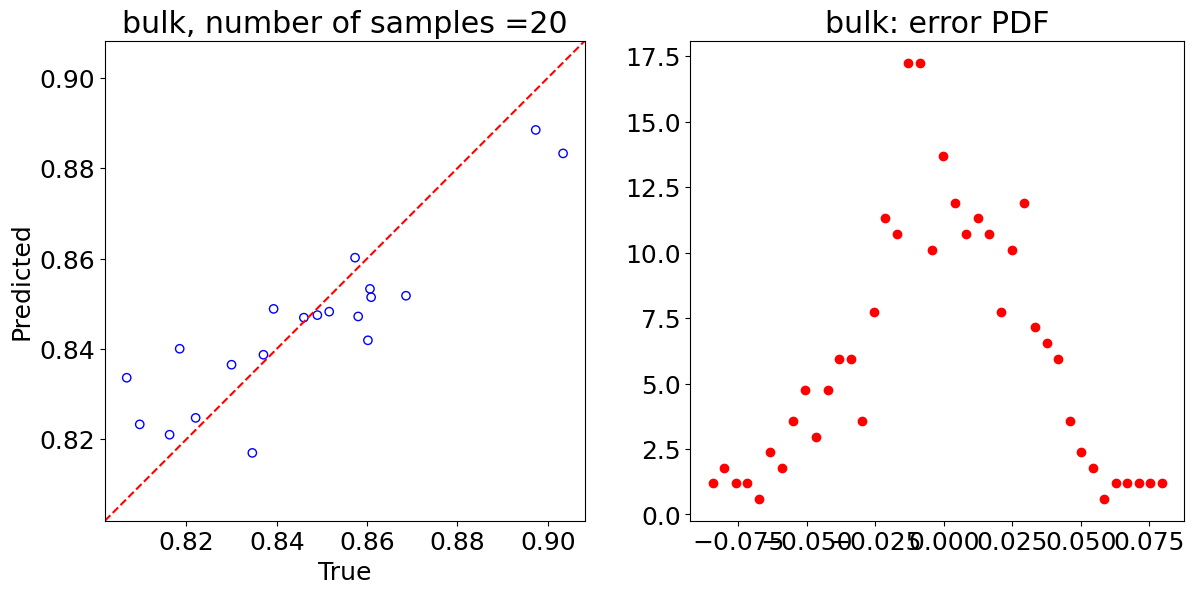

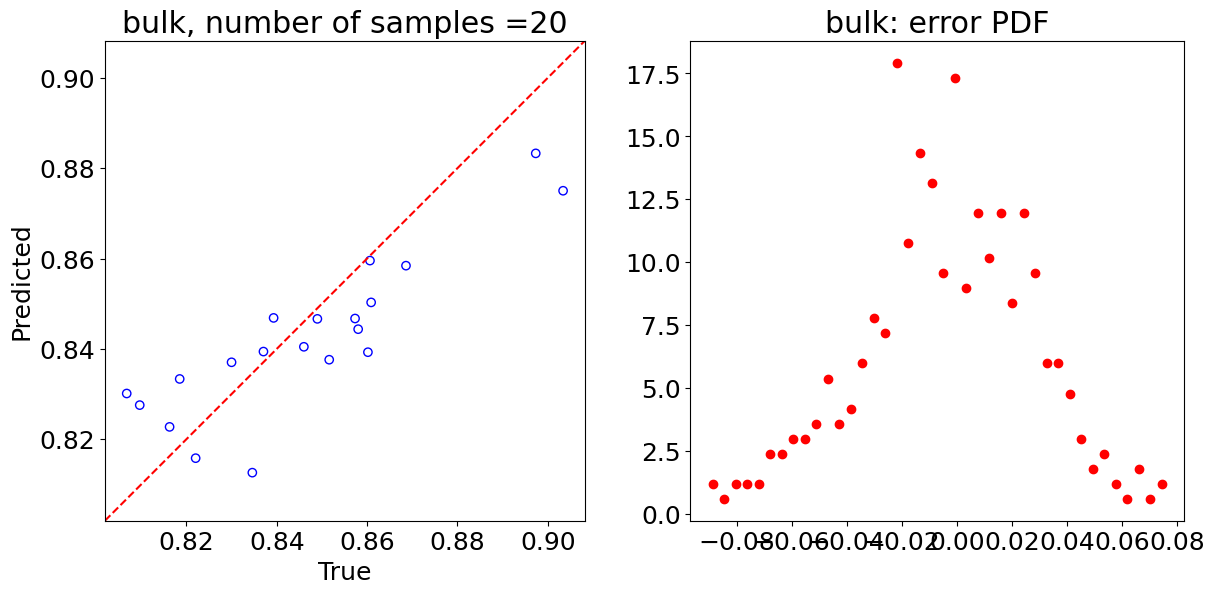

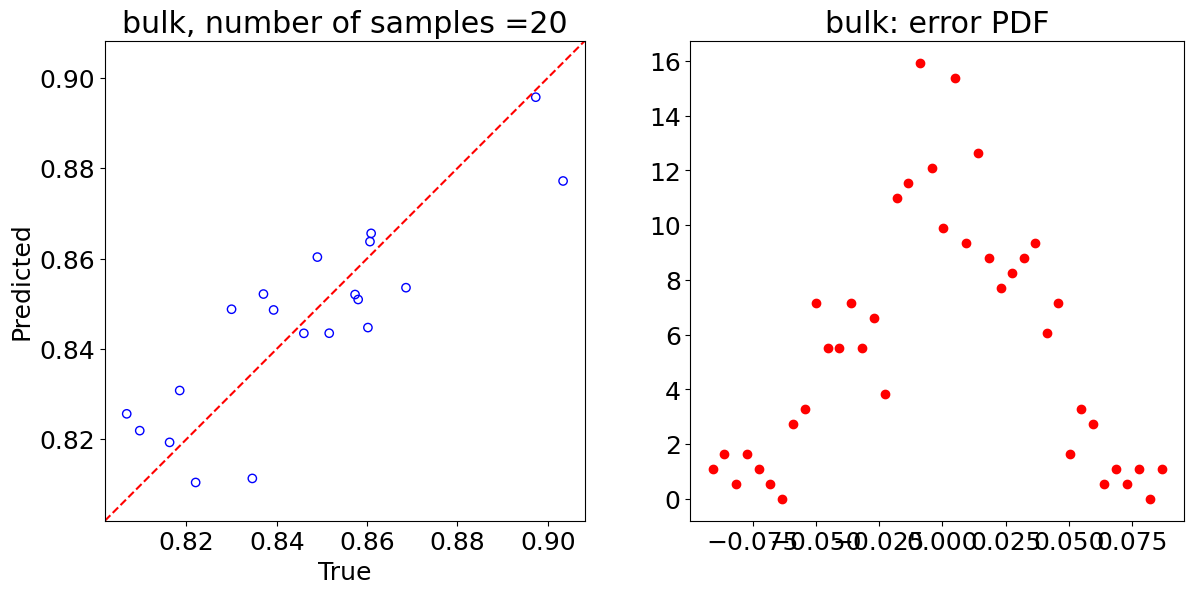

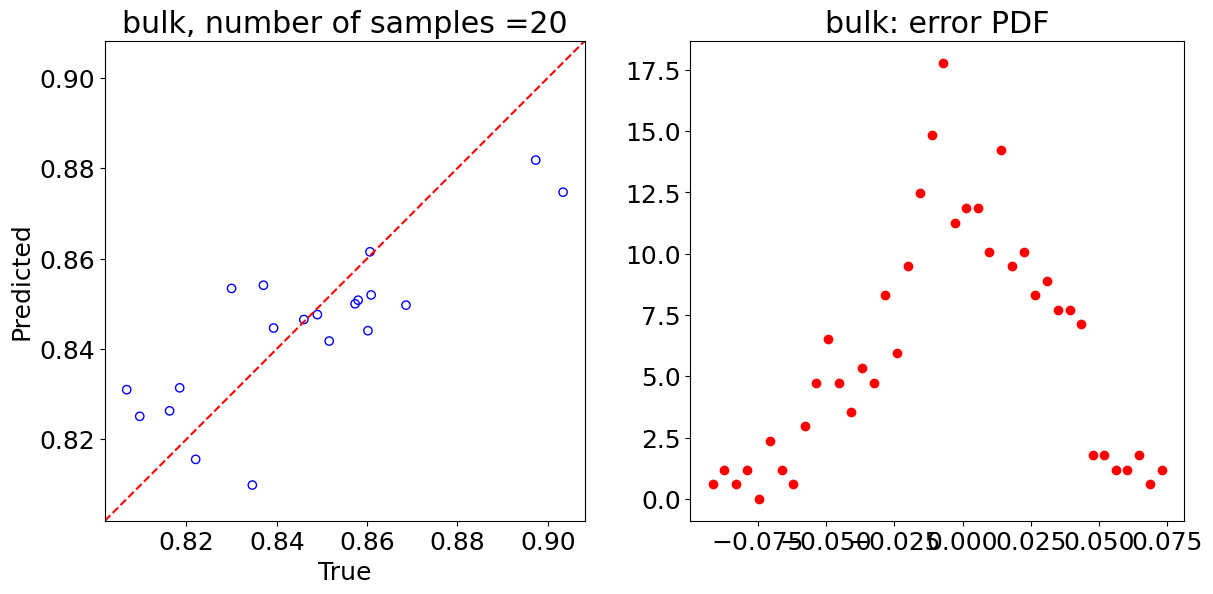

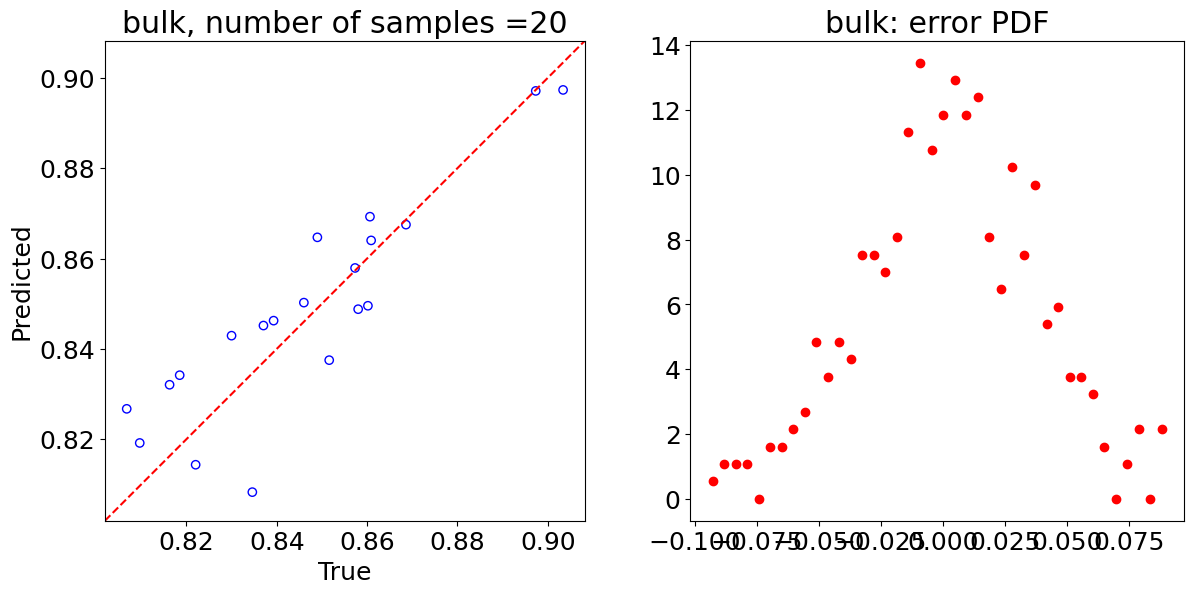

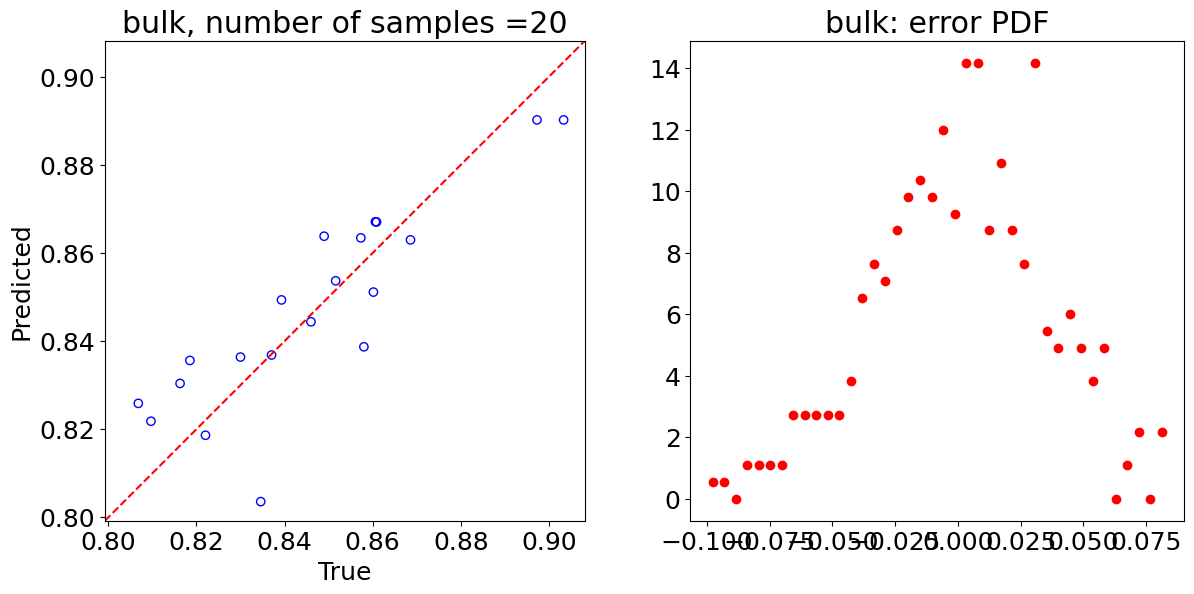

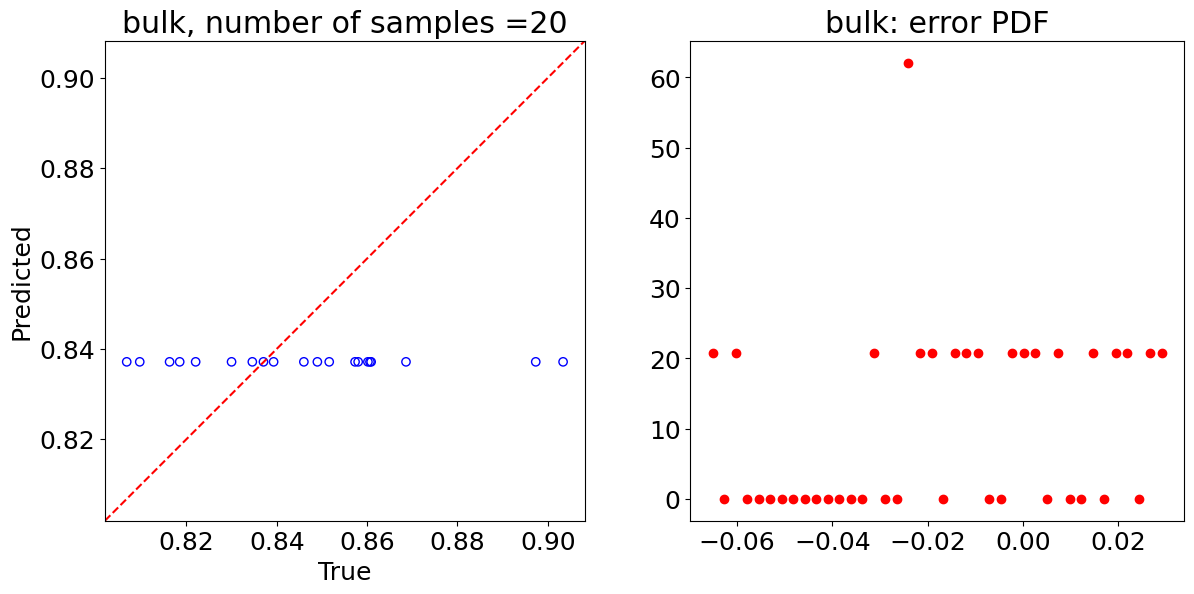

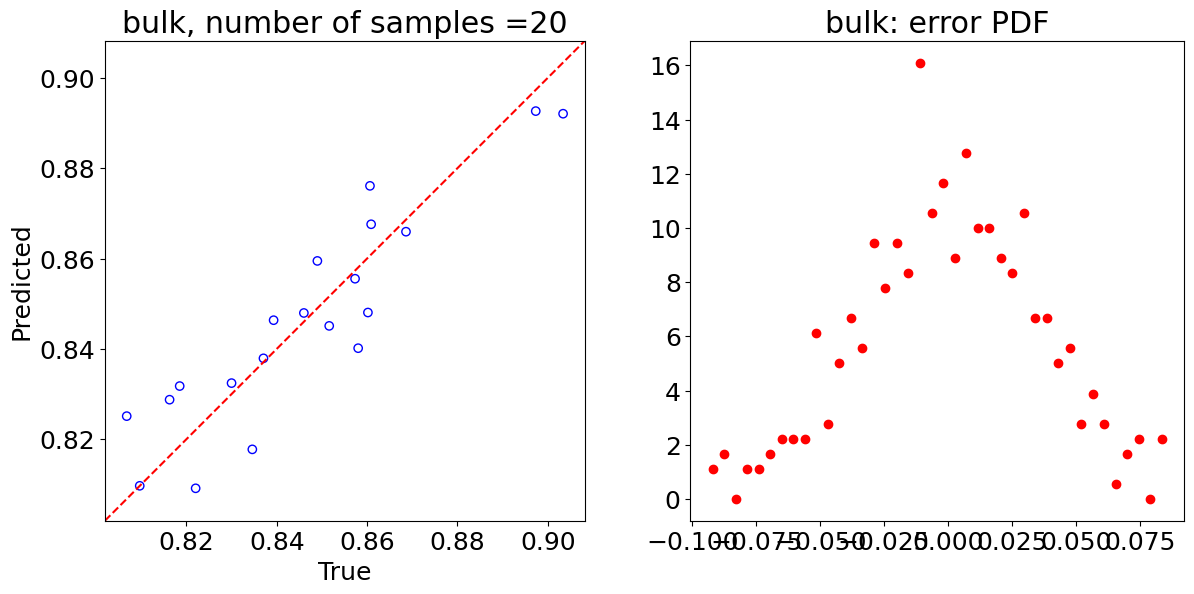

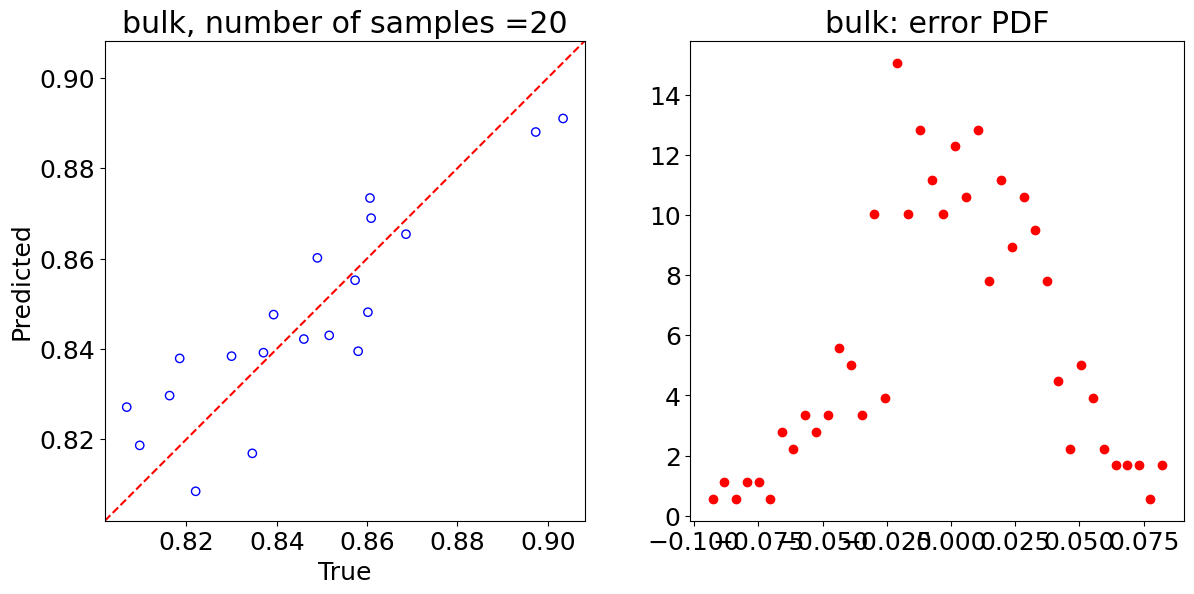

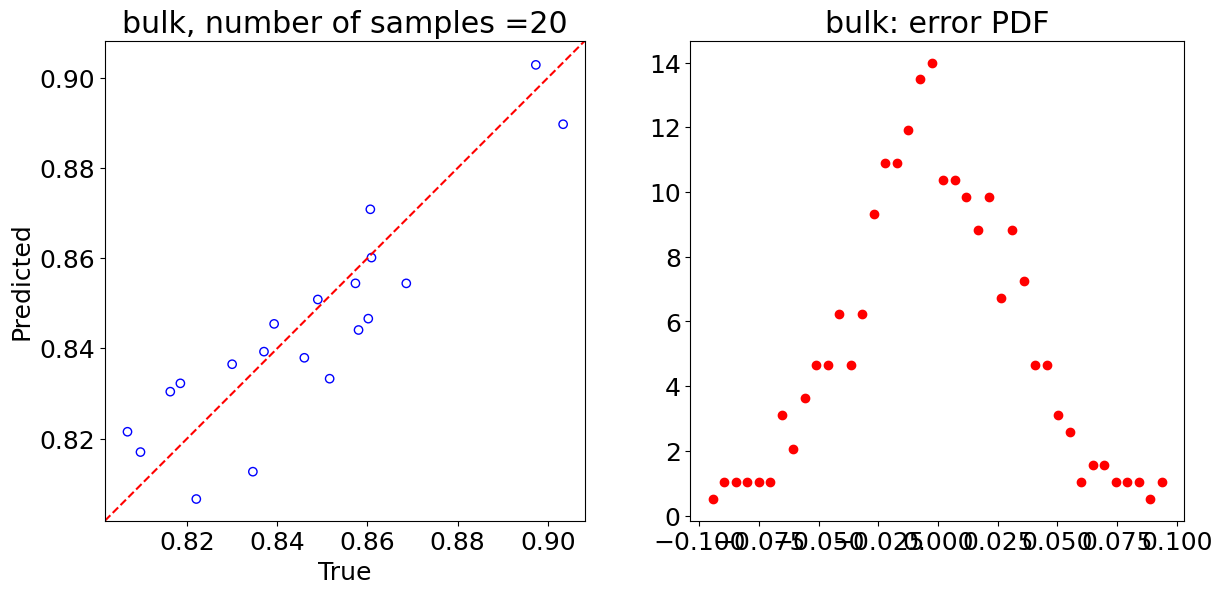

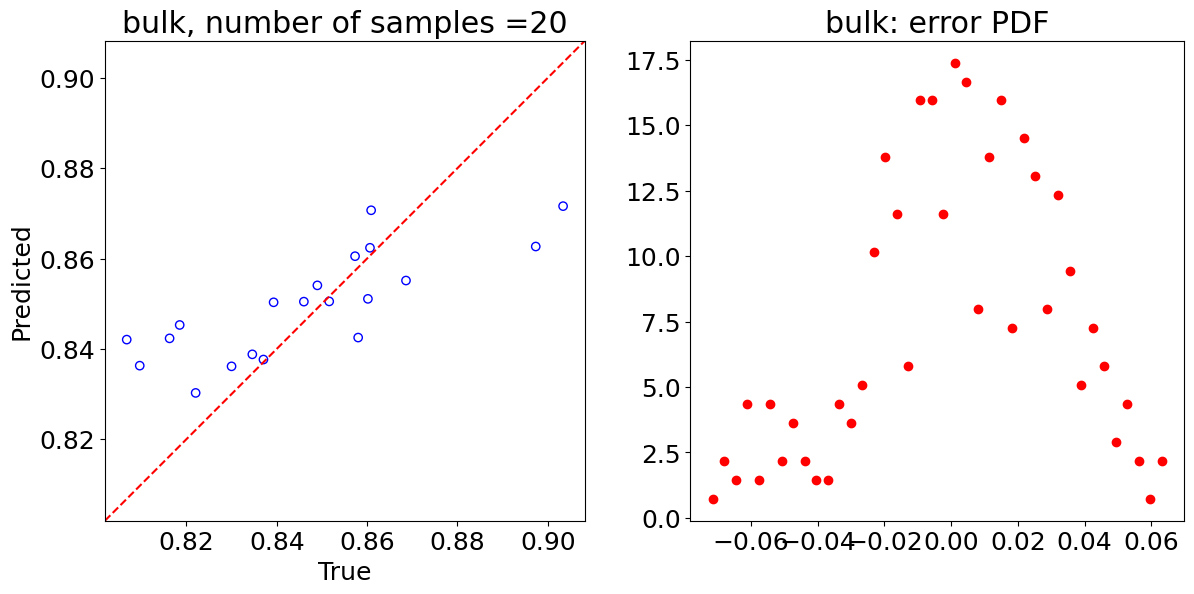

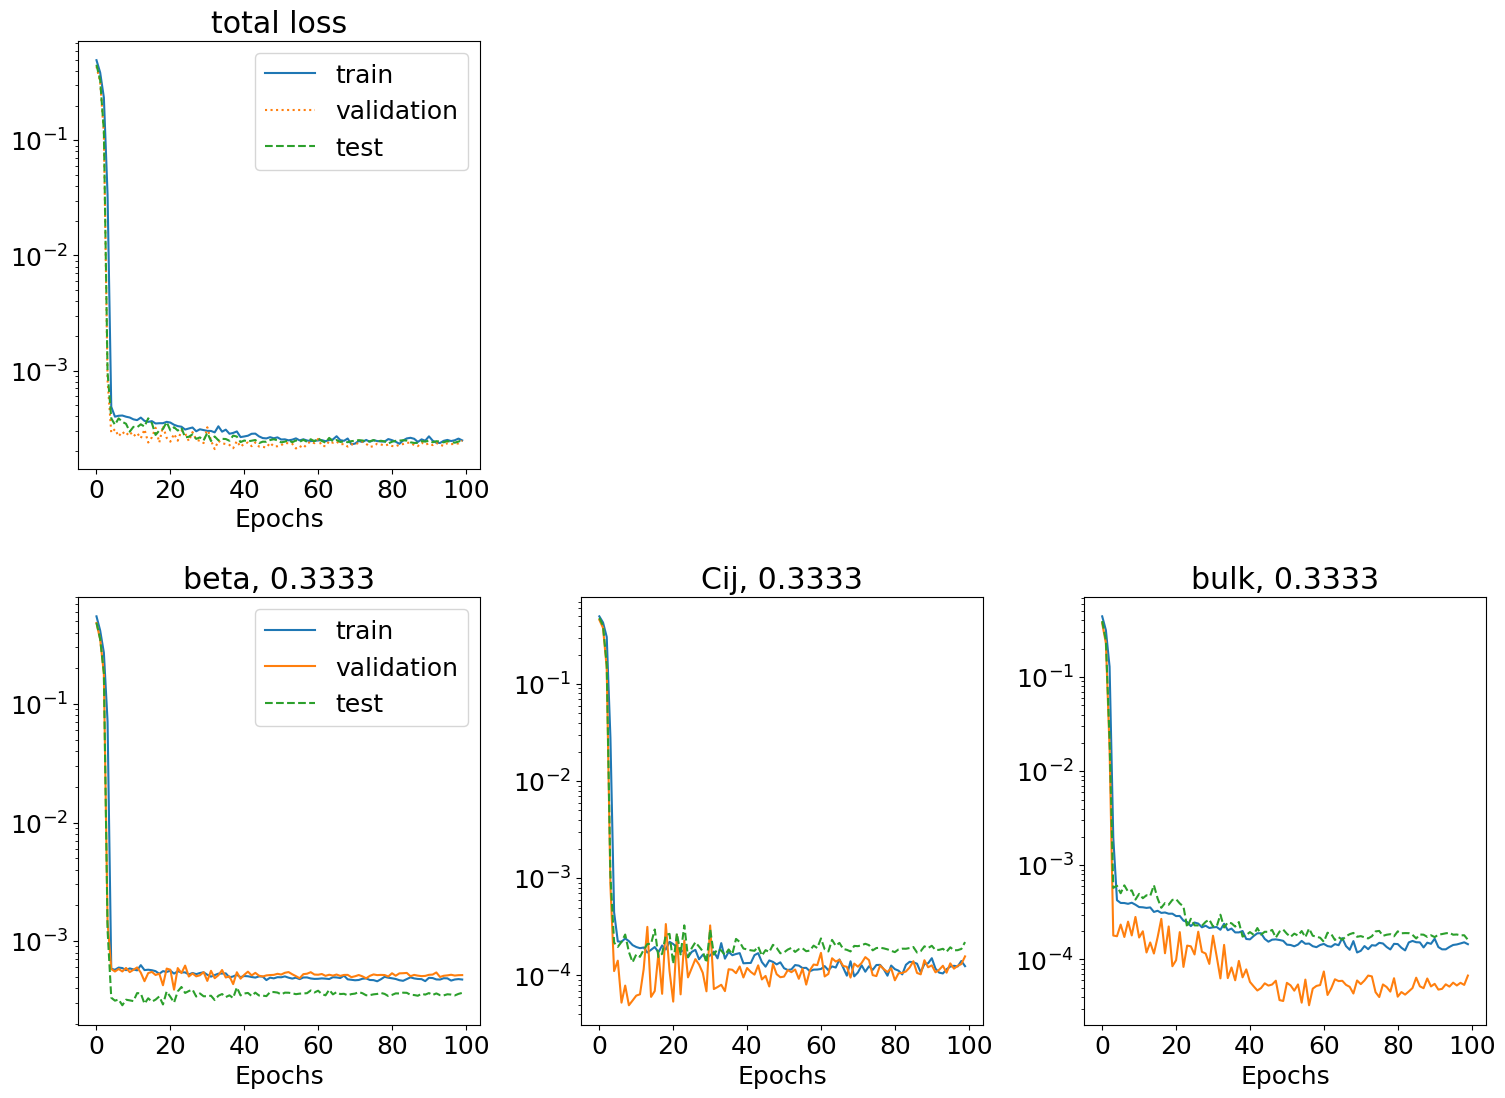

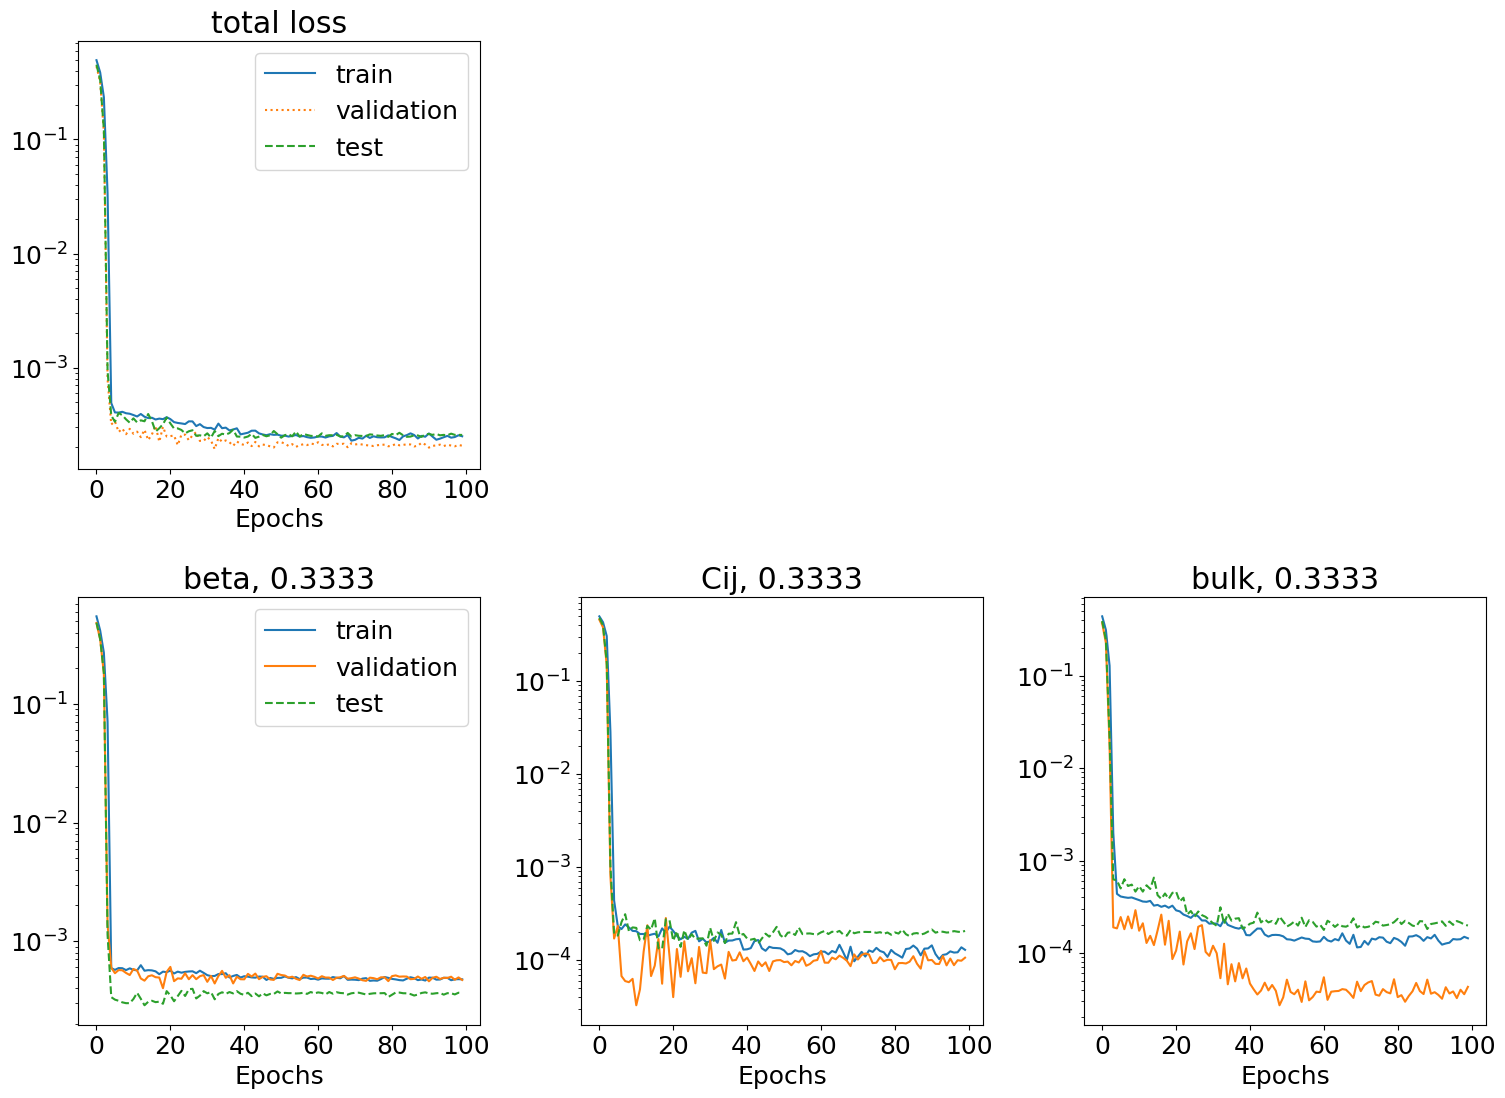

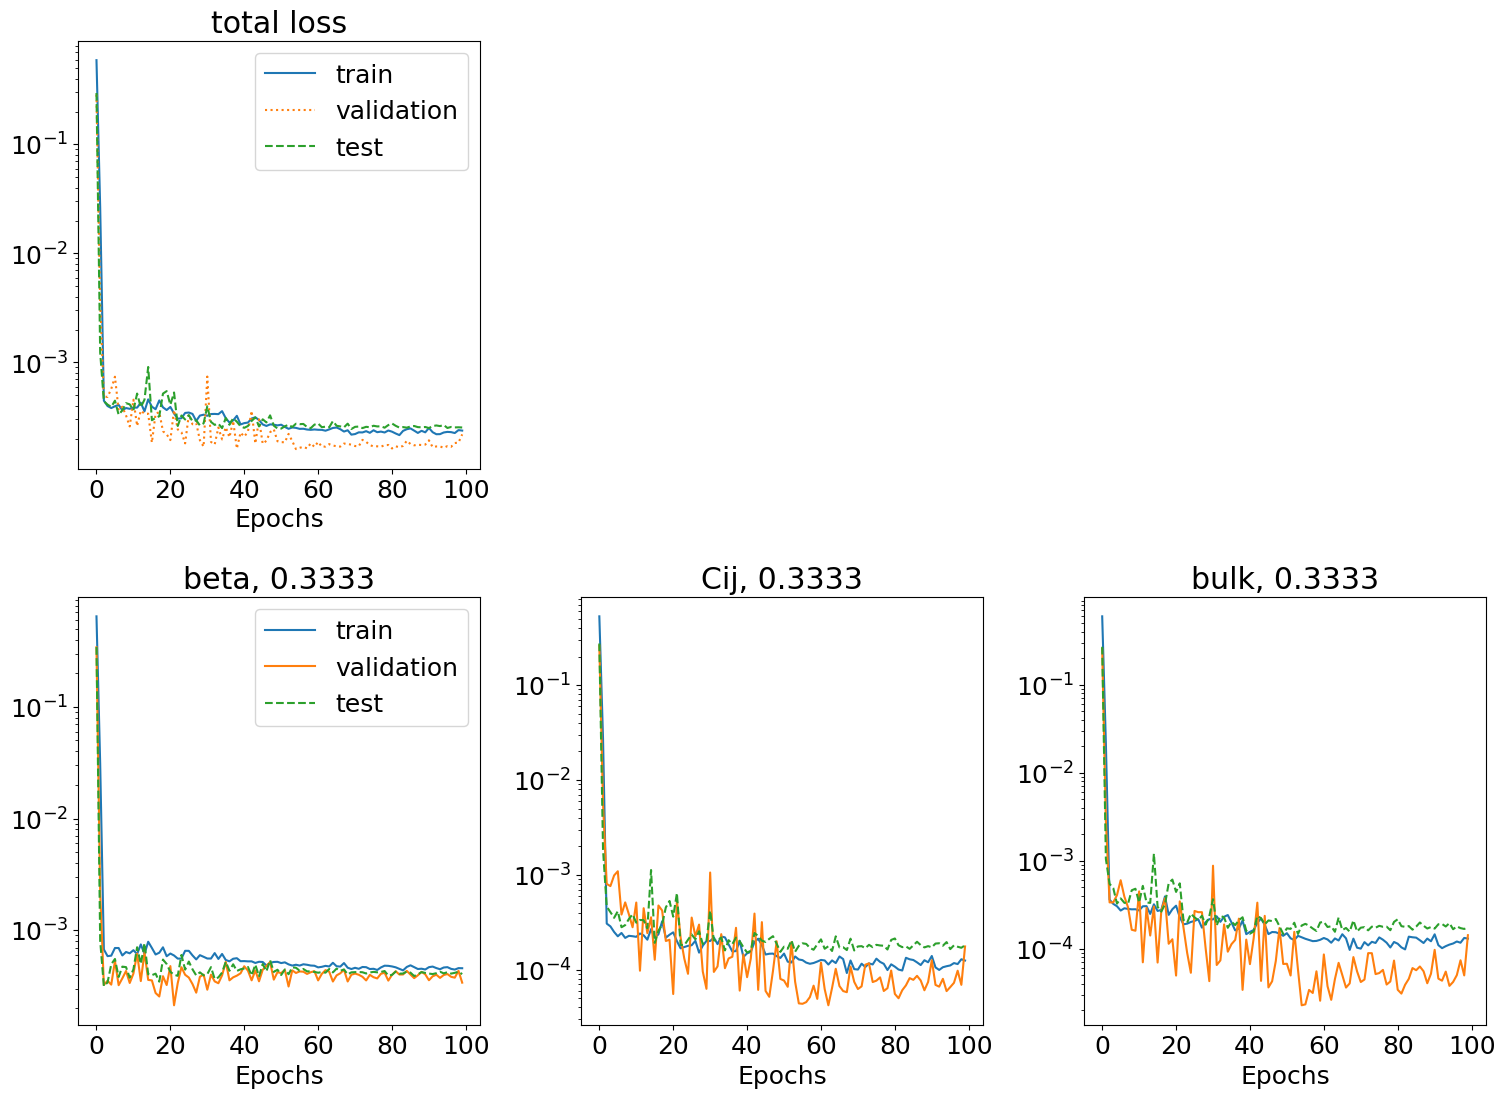

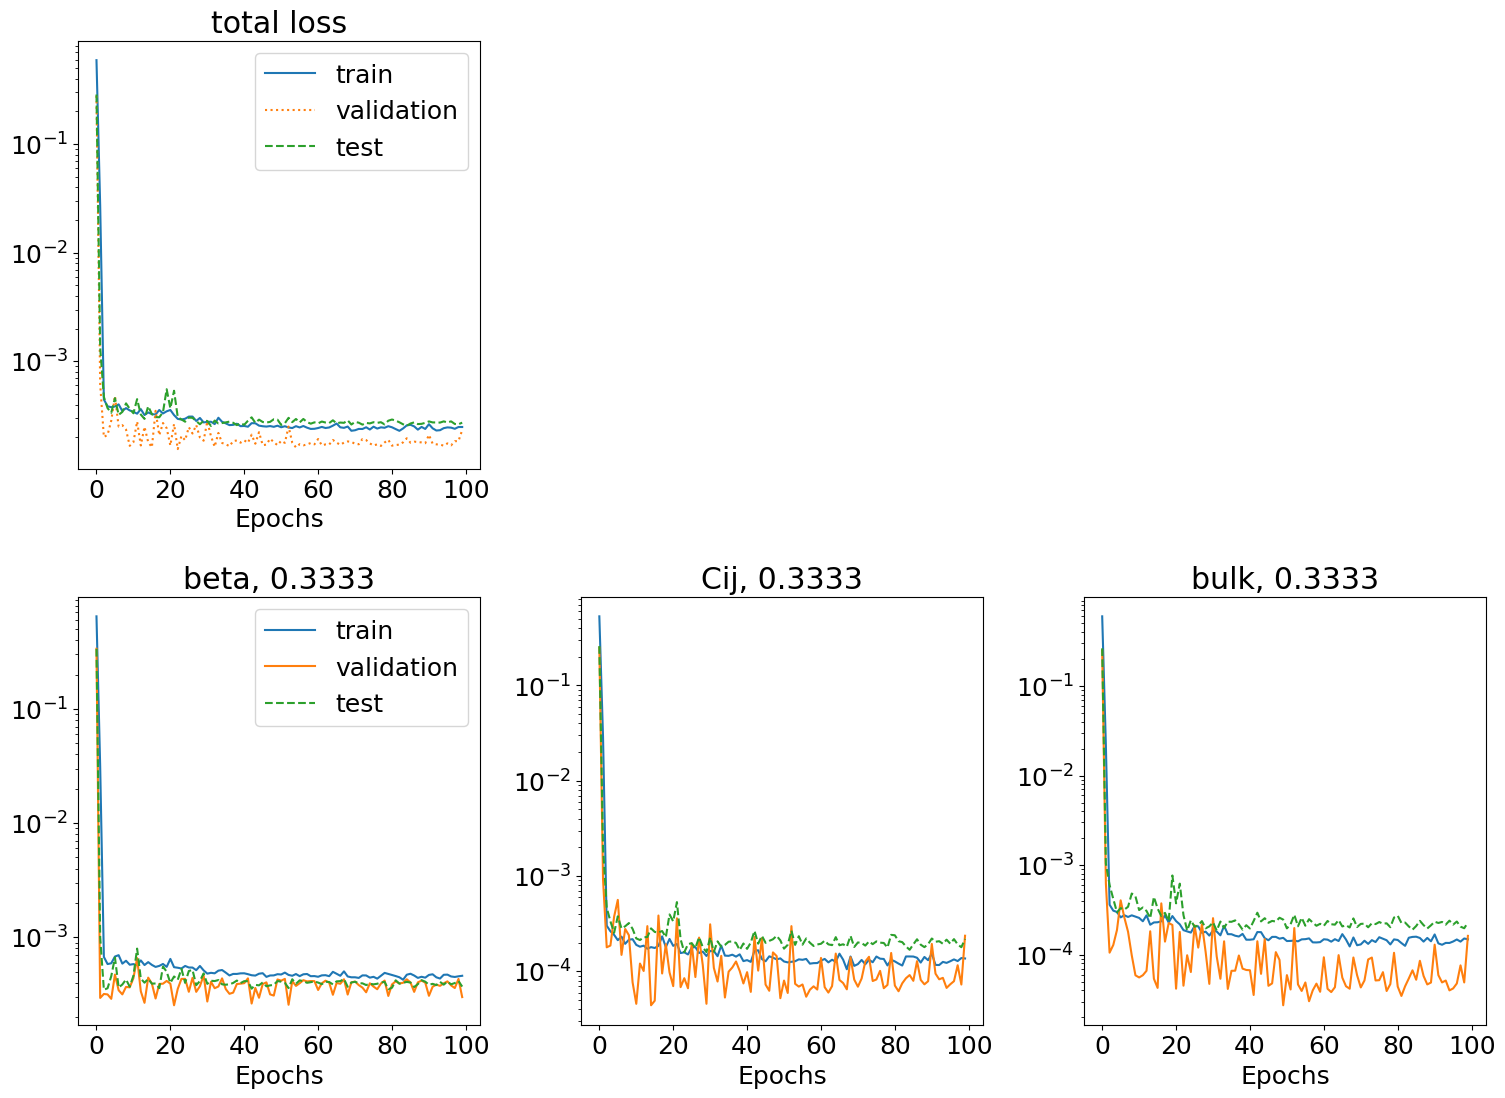

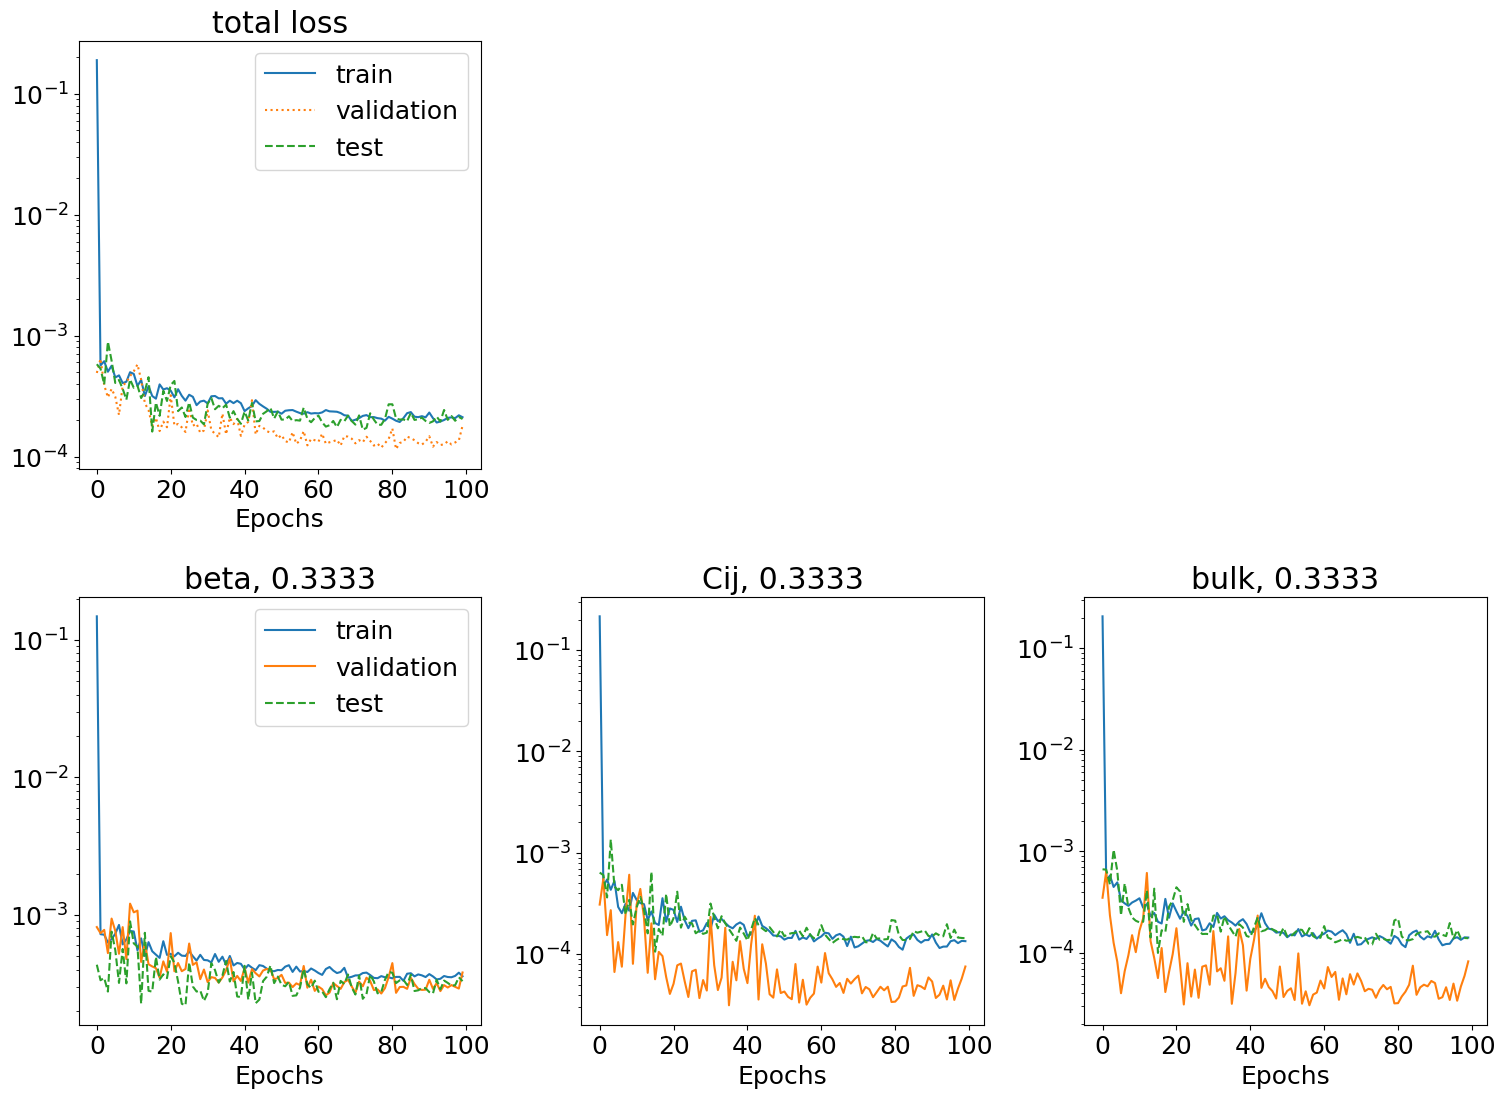

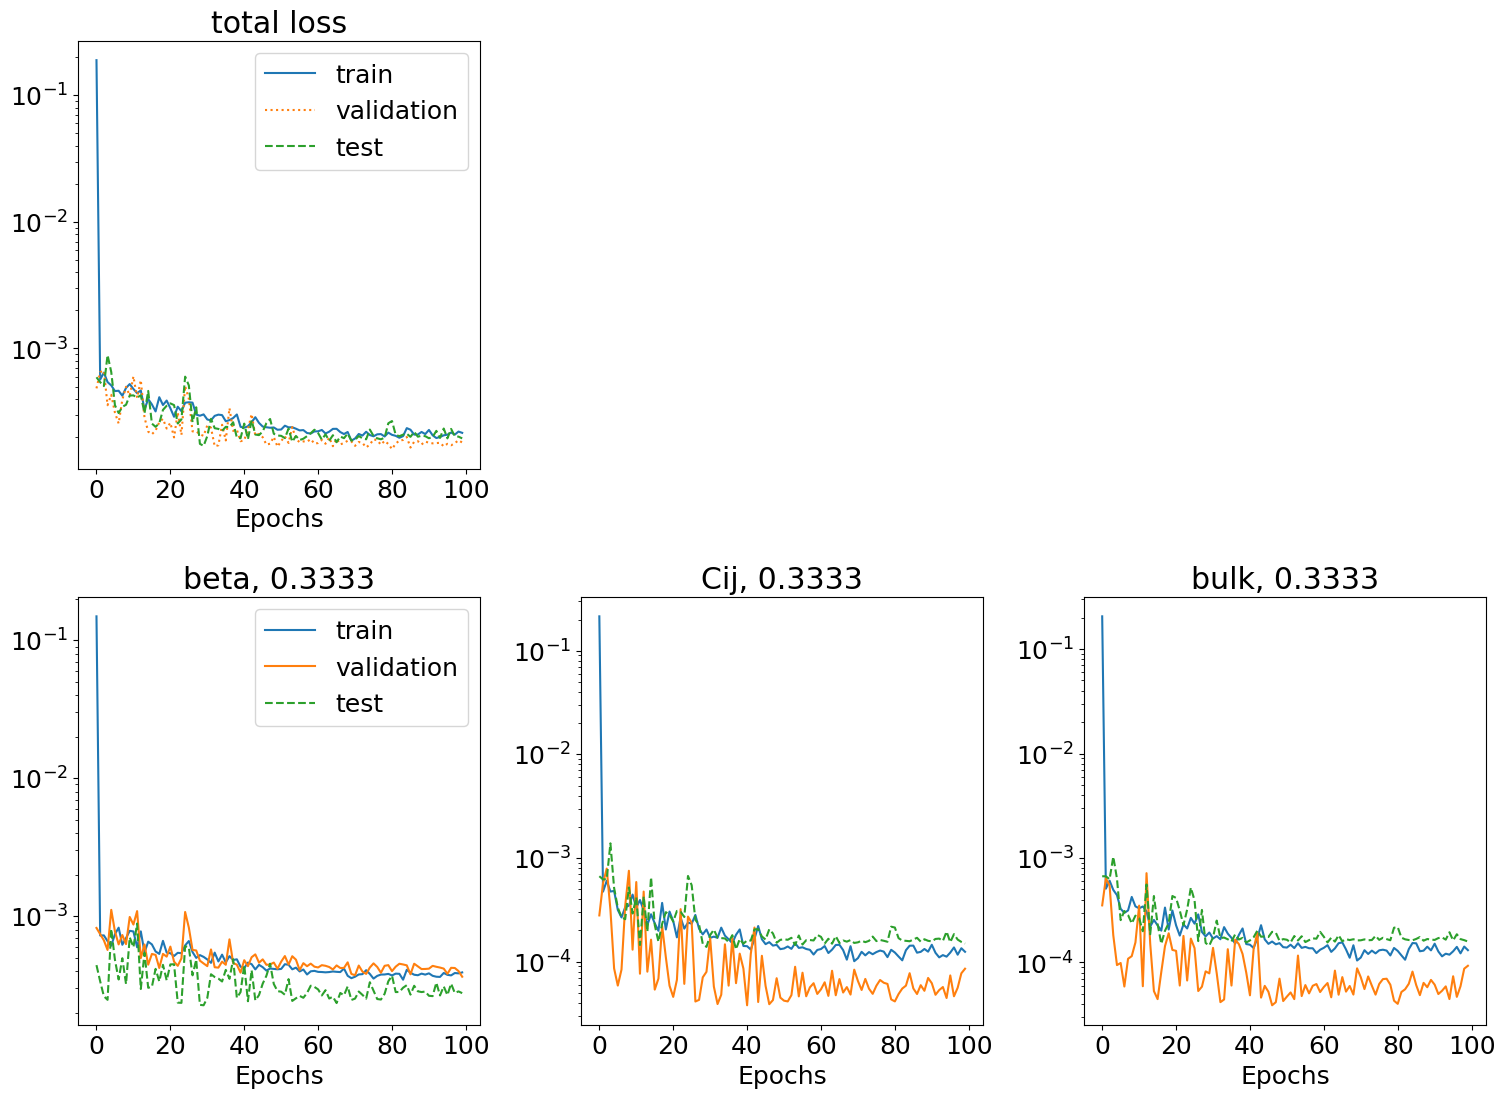

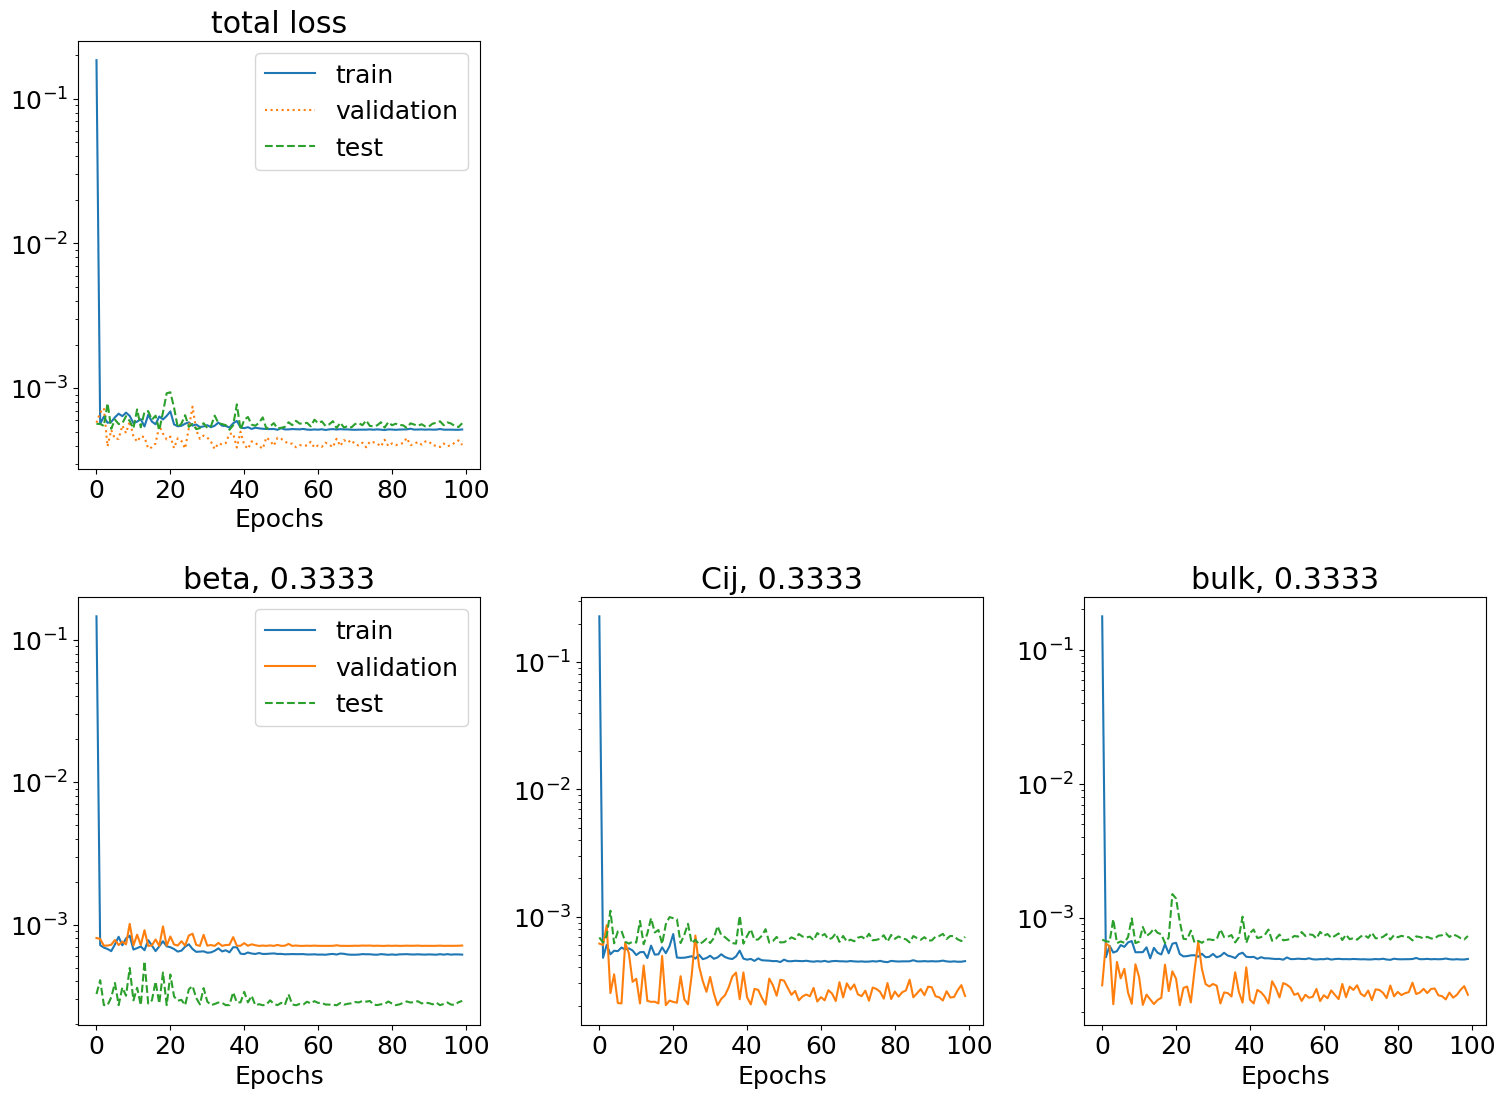

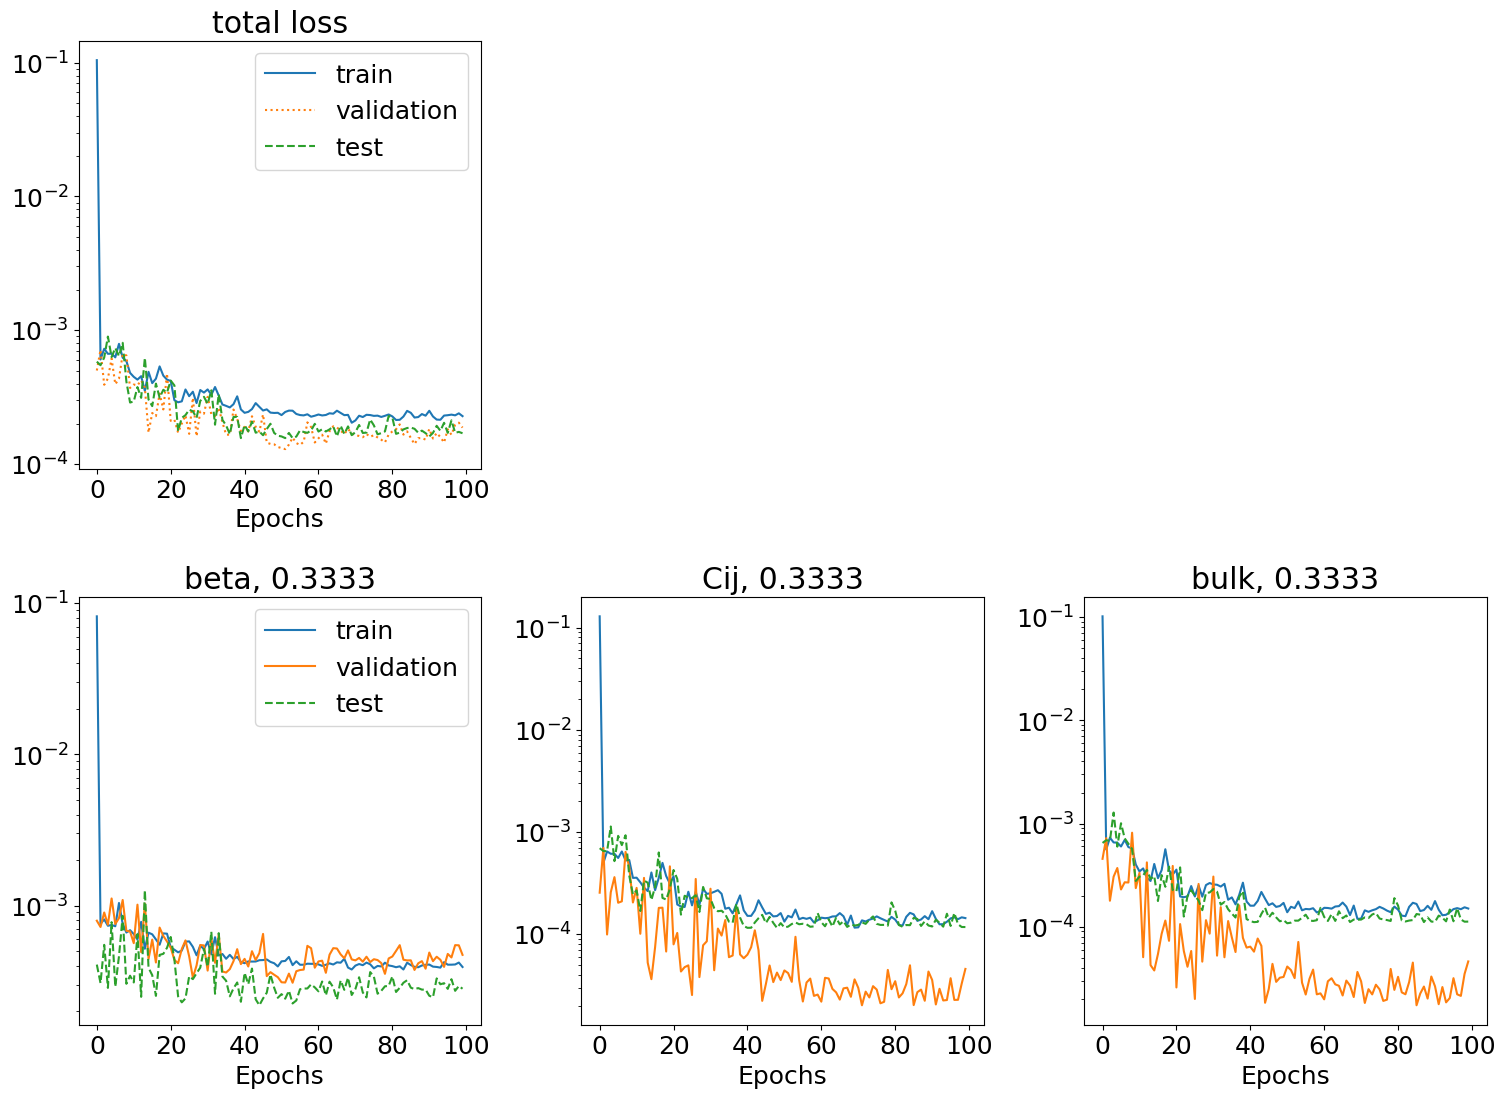

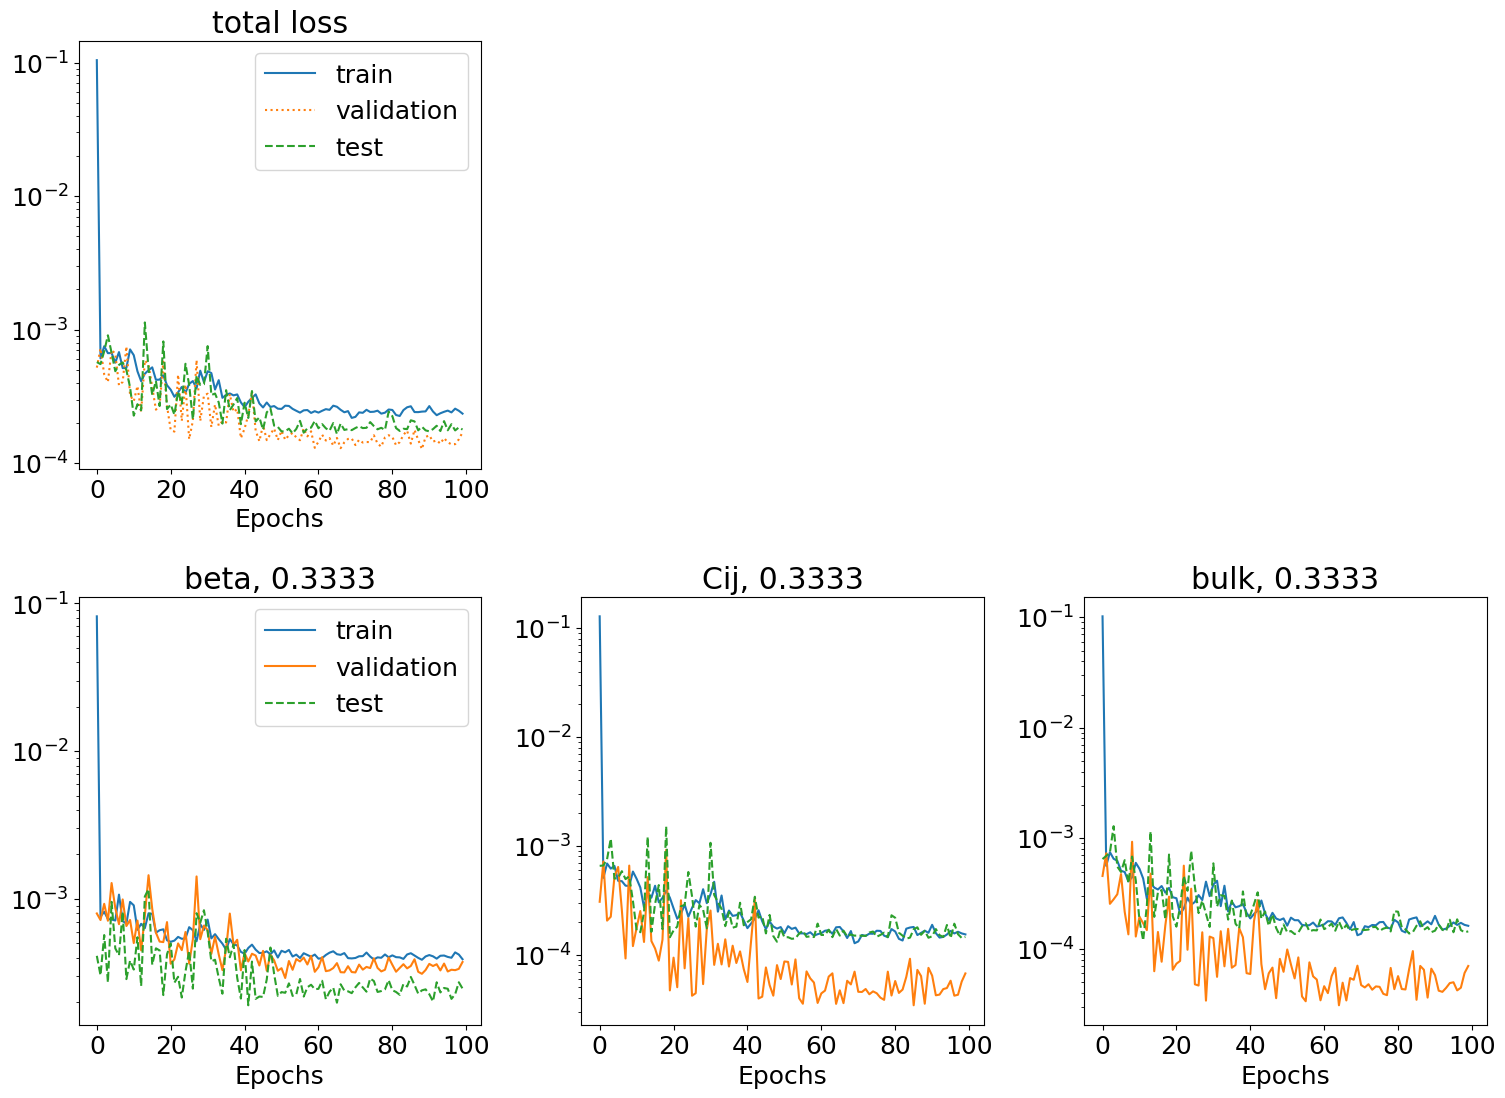

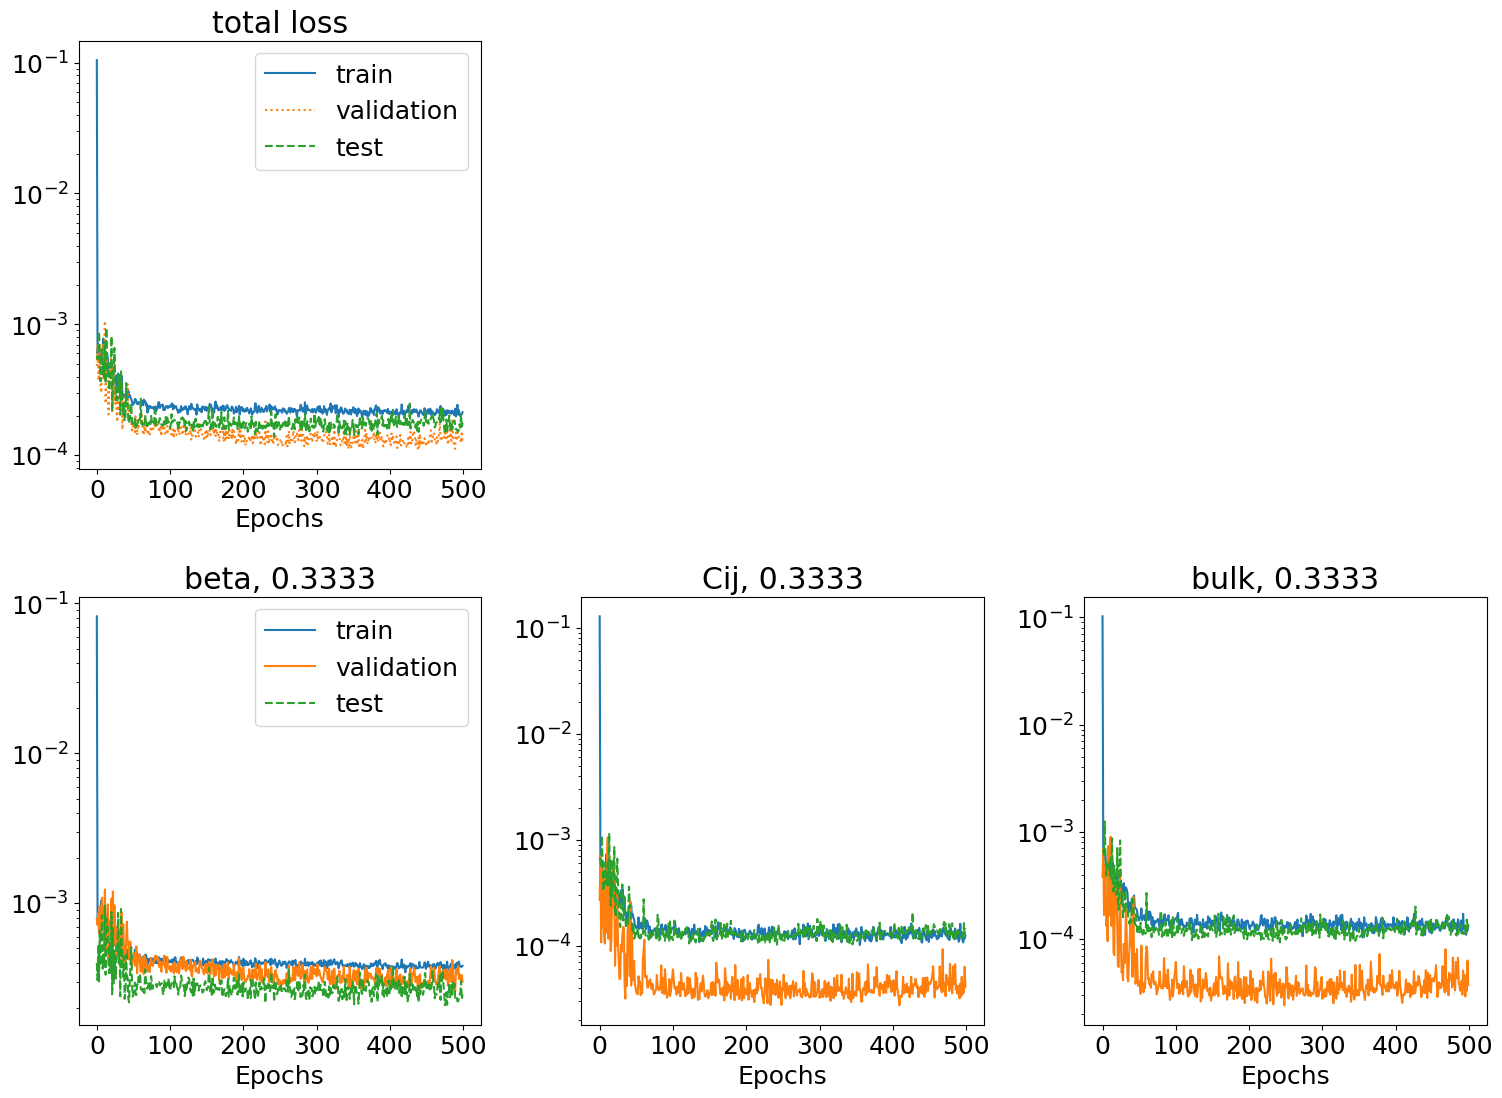

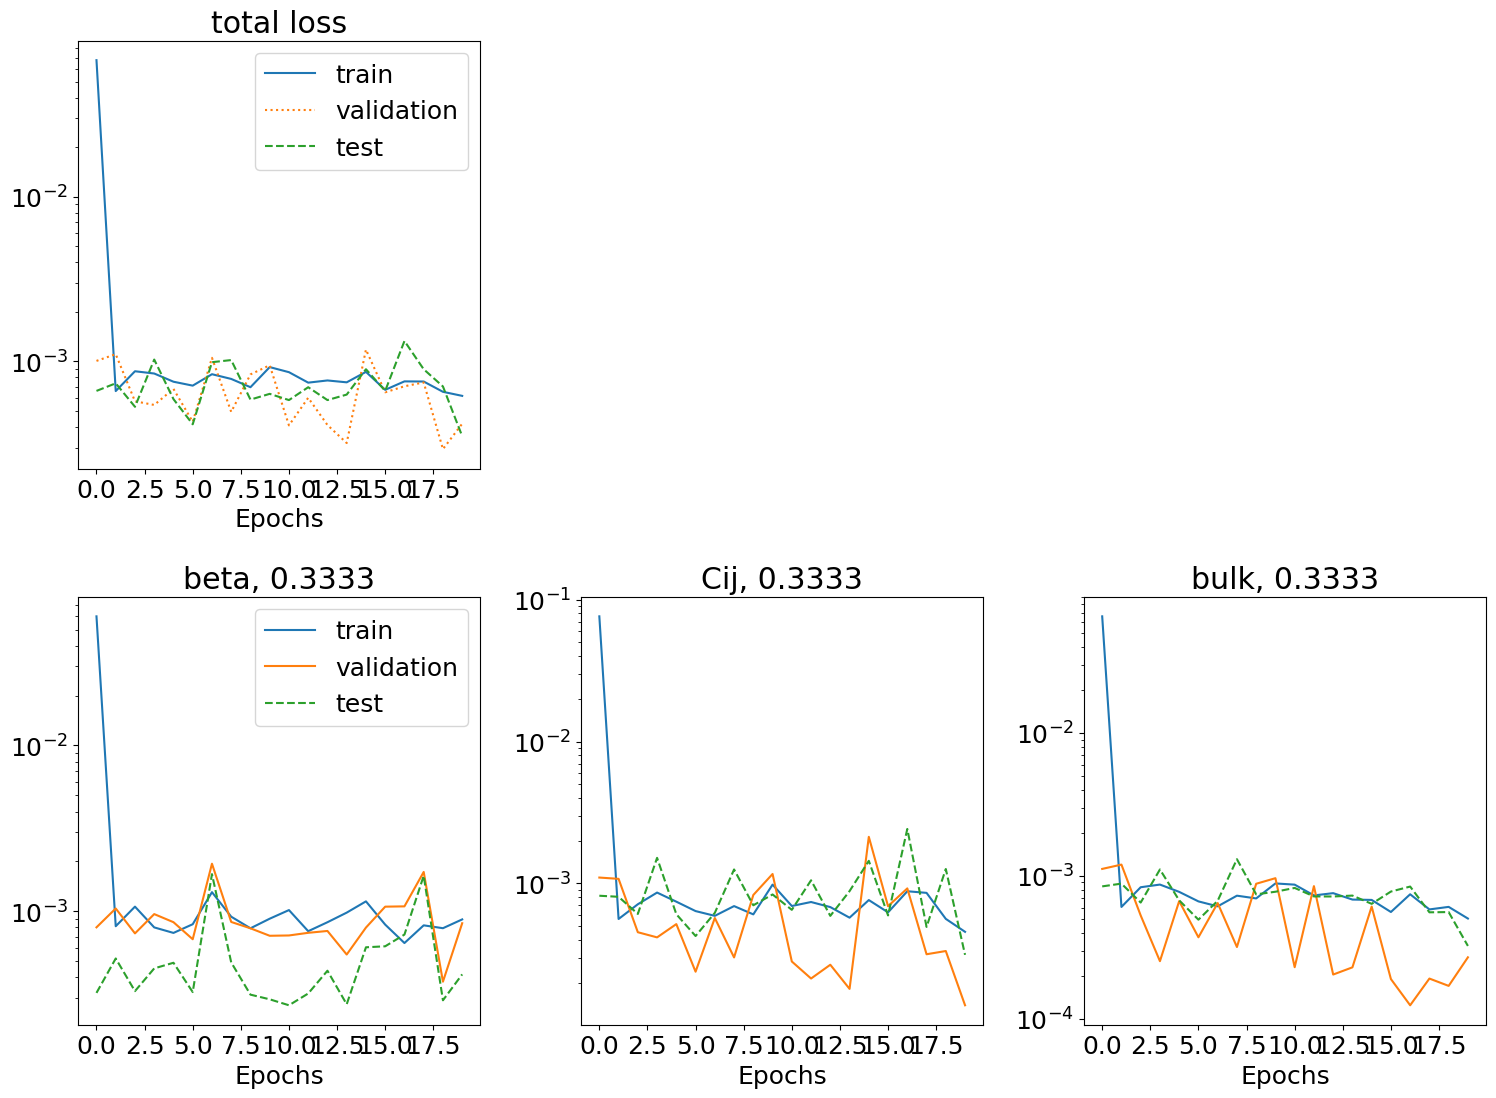

In [314]:
def load_pkl(file_path):
    with open(file_path, "rb") as f:
        fig = pickle.load(f)

    ax = fig.axes[0]

    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()

    scatter_data = [collection.get_offsets() for collection in ax.collections]
    data = [np.array(data) for data in scatter_data]
    line_data = [[line.get_data() for line in ax.lines]]
    handles, labels = ax.get_legend_handles_labels()

    if len(fig.axes) > 3:
        #line_data = [[line.get_data() for line in ax.lines] for ax in fig.axes[3:6]]
        line_data.extend([[line.get_data() for line in ax.lines] for ax in fig.axes[3:6]])
        ax_titles = [fig.axes[0].get_title()]
        ax_titles.extend([ax.get_title() for ax in fig.axes[3:6]])
    else:
        ax_titles = []

    return {
        'scatter_data': scatter_data,
        'data': data,
        'line_data': line_data,
        'handles': handles,
        'labels': labels,
        'x_min': x_min,
        'x_max': x_max,
        'y_min': y_min,
        'y_max': y_max,
        'ax_titles': ax_titles
    }

bulk_pkl_path = lambda x: f'pna/logs/overfitting/{x}/bulk.pkl'
hist_pkl_path = lambda x: f'pna/logs/overfitting/{x}/history_loss.pkl'

runs = ['32x10','32x10_gpu','128x10','128x10_gpu','512x10','512x10_gpu','512x20_gpu','1024x10','1024x10_gpu','1024x10_gpu_500ep','2048x10_gpu_20ep']

bulk_data = {run: load_pkl(bulk_pkl_path(run)) for run in runs}
hist_data = {run: load_pkl(hist_pkl_path(run)) for run in runs}


In [315]:
runs

['32x10',
 '32x10_gpu',
 '128x10',
 '128x10_gpu',
 '512x10',
 '512x10_gpu',
 '512x20_gpu',
 '1024x10',
 '1024x10_gpu',
 '1024x10_gpu_500ep',
 '2048x10_gpu_20ep']

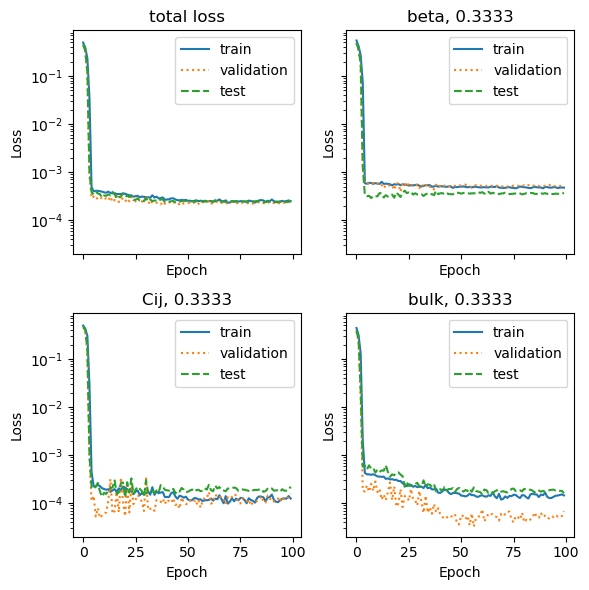

In [133]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6),sharex=True, sharey=True)
axes = axes.flatten()

linestyles= ['-', ':', '--']
labels = hist_data['32x10']['labels']
for i, line_data in enumerate(hist_data['32x10']['line_data']):
    for j, curve_data in enumerate(line_data):
        axes[i].plot(curve_data[0], curve_data[1], linestyle=linestyles[j])

    axes[i].set_yscale('log')
    axes[i].set_title(hist_data['32x10']['ax_titles'][i])
    axes[i].legend(labels)
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Loss')

plt.tight_layout()
plt.show()

In [228]:
runs

{'1024x10_gpu',
 '1024x10_gpu_500ep',
 '128x10',
 '2048x10_gpu_20ep',
 '32x10',
 '512x10_gpu',
 '512x20_gpu'}

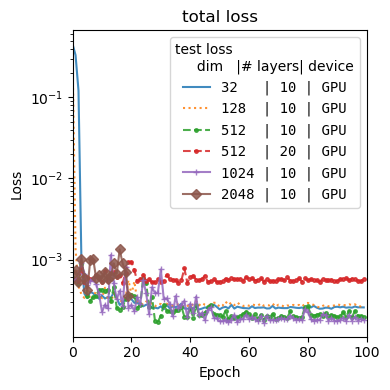

In [316]:
fig, ax = plt.subplots(figsize=(4, 4))

curve_dict = {'train': 0, 'validation': 1, 'test': 2}

#ax_titles = hist_data['32x10']['ax_titles']
ax_titles = ['total', 'beta', 'Cij' , 'bulk']
loss_dict = {title: i for i, title in enumerate(ax_titles)}

loss_name  = 'total'
curve_name = 'test'

linestyles= ['-', ':', '--', '--','-', '-']

plot_runs = ['32x10','128x10','512x10','512x20_gpu','1024x10_gpu','2048x10_gpu_20ep']
plot_runs = ['32x10_gpu','128x10_gpu','512x10_gpu','512x20_gpu','1024x10_gpu','2048x10_gpu_20ep']
#plot_runs = ['512x10','512x20_gpu']
#plot_runs = ['1024x10','1024x10_gpu']

labels = ['32   | 10 | GPU',
          '128  | 10 | GPU',
          '512  | 10 | GPU',
          '512  | 20 | GPU',
          '1024 | 10 | GPU',
          '2048 | 10 | GPU']

markers = [None, None, '.', '.', '+', 'D', 'v']
colors  = ['k', 'g', 'r', 'c', 'm', 'k', 'y']
for i, run in enumerate(plot_runs):
    #print(hist_data[run]['line_data'][0][0])
    x=hist_data[run]['line_data'][loss_dict[loss_name]][curve_dict[curve_name]][0]
    y=hist_data[run]['line_data'][loss_dict[loss_name]][curve_dict[curve_name]][1]
    ax.plot(x, y, label=labels[i], alpha=0.85, linewidth=1.5,marker=markers[i],markersize=5
            ,linestyle=linestyles[i],)

    ax.set_yscale('log')
    ax.set_title(hist_data['32x10']['ax_titles'][loss_dict[loss_name]])
    ax.legend(title=f'{curve_name} loss \n     dim   |# layers| device',prop={'family': 'DejaVu Sans Mono'}) #curve_name
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')

plt.xlim(0, 100)
plt.tight_layout()
plt.show()

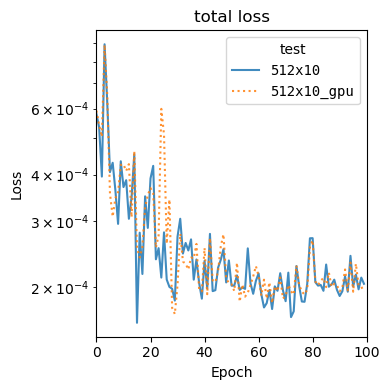

In [341]:
fig, ax = plt.subplots(figsize=(4, 4))

curve_dict = {'train': 0, 'validation': 1, 'test': 2}

#ax_titles = hist_data['32x10']['ax_titles']
ax_titles = ['total', 'beta', 'Cij' , 'bulk']
loss_dict = {title: i for i, title in enumerate(ax_titles)}

loss_name  = 'total'
curve_name = 'test'

linestyles= ['-', ':', '--', '--','-', '-']

plot_runs = ['32x10','128x10','512x10','512x20_gpu','1024x10_gpu','2048x10_gpu_20ep']
plot_runs = ['32x10_gpu','128x10_gpu','512x10_gpu','512x20_gpu','1024x10_gpu','2048x10_gpu_20ep']
#plot_runs = ['512x10','512x20_gpu']
#plot_runs = ['1024x10','1024x10_gpu']
plot_runs = ['512x10','512x10_gpu']
labels = ['32   | 10 | GPU',
          '128  | 10 | GPU',
          '512  | 10 | GPU',
          '512  | 20 | GPU',
          '1024 | 10 | GPU',
          '2048 | 10 | GPU']

markers = [None, None, '.', '.', '+', 'D', 'v']
colors  = ['k', 'g', 'r', 'c', 'm', 'k', 'y']
for i, run in enumerate(plot_runs):
    #print(hist_data[run]['line_data'][0][0])
    x=hist_data[run]['line_data'][loss_dict[loss_name]][curve_dict[curve_name]][0]
    y=hist_data[run]['line_data'][loss_dict[loss_name]][curve_dict[curve_name]][1]
    ax.plot(x, y, label=run, alpha=0.85, linewidth=1.5,marker=markers[i],markersize=5
            ,linestyle=linestyles[i],)

    ax.set_yscale('log')
    ax.set_title(hist_data['32x10']['ax_titles'][loss_dict[loss_name]])
    ax.legend(title=f'{curve_name}',prop={'family': 'DejaVu Sans Mono'}) #curve_name
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')

plt.xlim(0, 100)
plt.tight_layout()
plt.show()

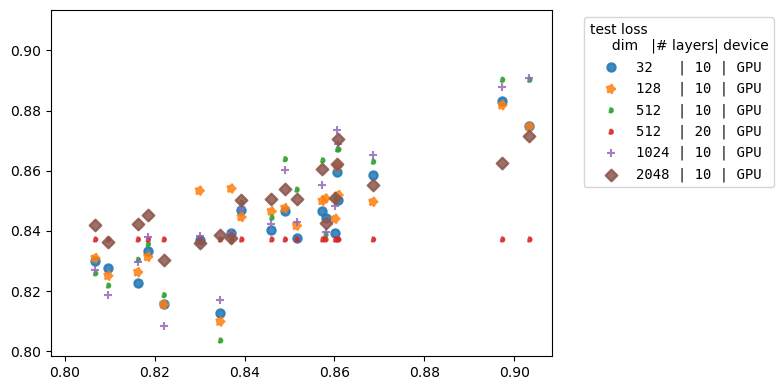

In [336]:
fig, ax = plt.subplots(figsize=(8, 4))

curve_dict = {'train': 0, 'validation': 1, 'test': 2}

#ax_titles = bulk_data['32x10']['ax_titles']
ax_titles = ['total', 'beta', 'Cij' , 'bulk']
loss_dict = {title: i for i, title in enumerate(ax_titles)}

loss_name  = 'total'
curve_name = 'test'

linestyles= ['-', ':', '--', '--','-', '-']

plot_runs = ['32x10','128x10','512x10','512x20_gpu','1024x10_gpu','2048x10_gpu_20ep']
plot_runs = ['32x10_gpu','128x10_gpu','512x10_gpu','512x20_gpu','1024x10_gpu','2048x10_gpu_20ep']
#plot_runs = ['512x10','512x20_gpu']
#plot_runs = ['1024x10','1024x10_gpu']

labels = ['32   | 10 | GPU',
          '128  | 10 | GPU',
          '512  | 10 | GPU',
          '512  | 20 | GPU',
          '1024 | 10 | GPU',
          '2048 | 10 | GPU']

markers = [None, None, '.', '.', '+', 'D', 'v']
colors  = ['k', 'g', 'r', 'c', 'm', 'k', 'y']
for i, run in enumerate(plot_runs):
    #print(bulk_data[run]['data'][0][0])
    x=bulk_data[run]['data'][0][:, 0]
    y=bulk_data[run]['data'][0][:, 1]
    ax.scatter(x, y, label=labels[i], alpha=0.85, linewidth=1.5,marker=markers[i]
            ,linestyle=linestyles[i],)

    #ax.set_yscale('log')
    #ax.set_title(bulk_data['32x10']['ax_titles'][loss_dict[loss_name]])

# Move the legend outside the plot
ax.legend(title=f'{curve_name} loss \n     dim   |# layers| device', prop={'family': 'DejaVu Sans Mono'},
          bbox_to_anchor=(1.05, 1), loc='upper left')

ax.plot(bulk_data[run]['line_data'][0][0][0][0], bulk_data[run]['line_data'][0][0][0][1], 
        c="red",linestyle="--")

#ax.set_xlabel('Epoch')
#ax.set_ylabel('Loss')

#plt.xlim(0, 100)
plt.tight_layout()
plt.show()

In [334]:
bulk_data[run]['line_data'][0][0][0][1]

0.9082088232040405

(0.8019532203674317, 0.9381849467754364)

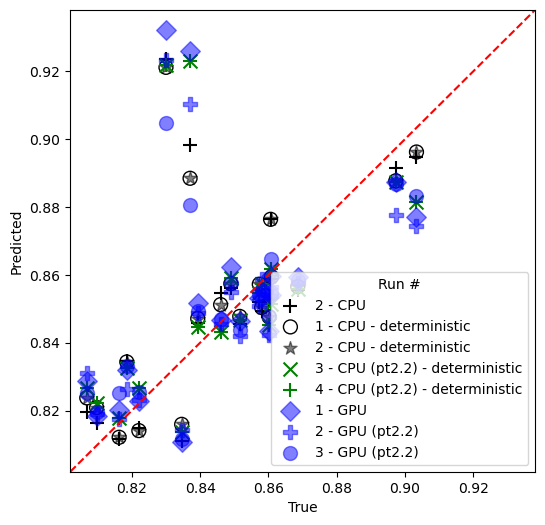

In [65]:
fig, ax = plt.subplots(figsize=(6, 6))




ax.scatter(run2_cpu['data'][0][:, 0], run2_cpu['data'][0][:, 1], 
           facecolors="k", label="2 - CPU", marker="+",s=100)
ax.scatter(run1_cpu['data'][0][:, 0], run1_cpu['data'][0][:, 1], 
           edgecolors="k", label="1 - CPU - deterministic", marker="o", facecolors='none',s=100)
ax.scatter(run2d_cpu['data'][0][:, 0], run2d_cpu['data'][0][:, 1], 
           facecolors="k", label="2 - CPU - deterministic", marker="*",s=100,alpha=0.5)


ax.scatter(run3_cpu['data'][0][:, 0], run3_cpu['data'][0][:, 1], 
           facecolors="g", label="3 - CPU (pt2.2) - deterministic", marker="x",s=100)
ax.scatter(run4_cpu['data'][0][:, 0], run4_cpu['data'][0][:, 1], 
           facecolors="g", label="4 - CPU (pt2.2) - deterministic", marker="+",s=100)


ax.scatter(run1['data'][0][:, 0], run1['data'][0][:, 1], 
           facecolors="b", label="1 - GPU ", marker="D",s=100,alpha=0.5)

ax.scatter(run2['data'][0][:, 0], run2['data'][0][:, 1], 
           facecolors="b", label="2 - GPU (pt2.2)", marker="P",s=100,alpha=0.5)
ax.scatter(run3['data'][0][:, 0], run3['data'][0][:, 1], 
           facecolors="b", label="3 - GPU (pt2.2)", marker="o",s=100,alpha=0.5)
ax.plot(run1['line_data'][0][0], run1['line_data'][0][1], 
        c="red",linestyle="--")

#plt.plot(x, y_fit, color='k')

ax.legend(title="Run #",loc="lower right")

ax.set_xlabel("True")
ax.set_ylabel("Predicted")

ax.set_xlim([run1['x_min'], run1['x_max']])
ax.set_ylim([run1['x_min'], run1['x_max']])